In [80]:
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix

In [81]:
#Read in the dataset
dataset = pd.read_csv('./data/nyt1.csv')

In [82]:
#Lets take a look at what data we are dealing with
dataset.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


In [83]:
#Here is our age list for reference, we'd like to create a new feature group based
#On the person's age
age_list = ["<18", "18-24", "25-34", "35-44", "45-54", "55-65", "65+"]
dataset = dataset.assign(age_group=dataset["Age"])

In [97]:
#Here is a helper function we can use to determine a person's age group
def assignAgeGroup(row):
    age = int(row.Age)
    if age < 18:
        return age_list[0]
    elif 18 <= age <= 24:
        return age_list[1]
    elif 25 <= age <= 34:
        return age_list[2]
    elif 35 <= age <= 44:
        return age_list[3]
    elif 45 <= age <= 54:
        return age_list[4]
    elif 55 <= age <= 64:
        return age_list[5]
    else:
        return age_list[6]

def assignClickThroughRate(row):
    clicks = int(row.Clicks)
    impressions = int(row.Impressions)
    try:
        return clicks / impressions
    except:
        return 0
#Lets take a look at the first bit of data so we can see the age group
dataset.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group,click_through_rate
0,36,0,3,0,1,3,0.0
1,73,1,3,0,1,6,0.0
2,30,0,3,0,1,2,0.0
3,49,1,3,0,1,4,0.0
4,47,1,11,0,1,4,0.0


In [98]:
#Right now the age group is just the age, so lets mutate that to place 
#Each person into the right group
dataset["age_group"] = dataset.apply(lambda row: assignAgeGroup(row), axis=1)
dataset["click_through_rate"] = dataset.apply(lambda row: assignClickThroughRate(row), axis=1)

In [99]:
#Alright, now our data should have the age group appropiately applied
dataset.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group,click_through_rate
0,36,0,3,0,1,35-44,0.0
1,73,1,3,0,1,65+,0.0
2,30,0,3,0,1,25-34,0.0
3,49,1,3,0,1,45-54,0.0
4,47,1,11,0,1,45-54,0.0


In [100]:
dataset.describe()

,Age,Gender,Impressions,Clicks,Signed_In,click_through_rate
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930,0.018347
std,23.607034,0.481997,2.239349,0.309973,0.457851,0.068820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e8afb6588>,
      dtype=object)

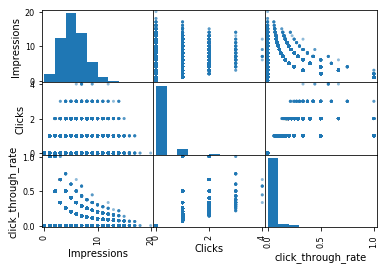

In [101]:
scatter_matrix(dataset[['age_group', 'Impressions', 'Clicks', 'click_through_rate']])

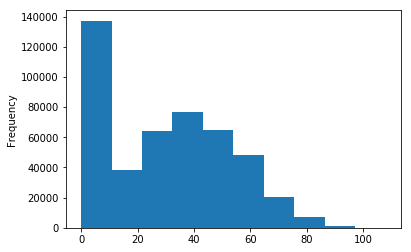

In [102]:
dataset['Age'].plot(kind='hist')

In [ ]:
dataset['click_through_rate'].plot(kind='hist')

In [ ]:
dataset.cumsum().plot()

In [ ]:
dataset.plot(x='Age', y='Clicks', kind='hist')

In [ ]:
dataset.plot(kind='hist')

In [ ]:
dataset[dataset.Clicks > 0].plot(kind='hist')

In [104]:
pd.pivot_table(dataset, values='Clicks', index='Impressions', columns='age_group')

age_group,18-24,25-34,35-44,45-54,55-65,65+,<18
Impressions,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.012248,0.009151,0.011780,0.009298,0.023562,0.021000,0.027341
2,0.025544,0.021450,0.019214,0.019648,0.041711,0.057143,0.058354
3,0.031662,0.031572,0.031942,0.027678,0.060479,0.097140,0.085681
4,0.041270,0.039738,0.038600,0.041748,0.078637,0.114483,0.111373
5,0.052961,0.050332,0.054294,0.051608,0.098939,0.149158,0.144734
6,0.056392,0.061629,0.059775,0.057174,0.121043,0.181994,0.173314
7,0.074388,0.071609,0.069912,0.070165,0.148704,0.206750,0.200390
8,0.094675,0.076843,0.087465,0.080779,0.161885,0.256693,0.219849


In [ ]:
dataset['Impressions'].value_counts()

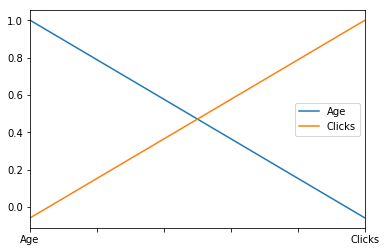

In [110]:
dataset[['Age', 'Clicks']].corr().plot()